DOG, CAT, PANDA CLASSIFICATION WITH CNN

Import các thư viện

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
import gdown
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Models
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Tải và giải nén tập dữ liệu

In [ ]:
# Tải dữ liệu trên gg drive về
!gdown 1qSzxFfsLM5AIAppggxrA_yQHA-pR79xg

Downloading...
From: https://drive.google.com/uc?id=1qSzxFfsLM5AIAppggxrA_yQHA-pR79xg
To: /content/DCP_dataset.zip
100% 394M/394M [00:08<00:00, 49.2MB/s]


In [ ]:
# Giải nén tập dữ liệu vừa tải
with zipfile.ZipFile('/content/DCP_dataset.zip', 'r') as zip:
	zip.extractall('.')
	print('Tập dữ liệu đã được giải nén.')

Tập dữ liệu đã được giải nén.


In [ ]:
# Hiển thị đường dẫn của các lớp cần phân loại
folder_path = '/content/animals/animals'
for dirname, _, _ in os.walk(folder_path):
    print(dirname)

/content/animals/animals
/content/animals/animals/panda
/content/animals/animals/dogs
/content/animals/animals/cats


In [ ]:
# Lấy số lượng ảnh
dog_count = len(os.listdir(folder_path + '/cats'))
cat_count = len(os.listdir(folder_path + '/dogs'))
panda_count = len(os.listdir(folder_path + '/panda'))

# In ra số lượng dữ liệu mỗi lớp
print('Tổng số ảnh mèo:', dog_count)
print('Tổng số ảnh chó:', cat_count)
print('Tổng số ảnh gấu trúc:', panda_count)

Tổng số ảnh mèo: 1000
Tổng số ảnh chó: 1000
Tổng số ảnh gấu trúc: 1000


Hiển thị 1 vài ảnh

Text(0.5, 1.0, 'Gấu trúc')

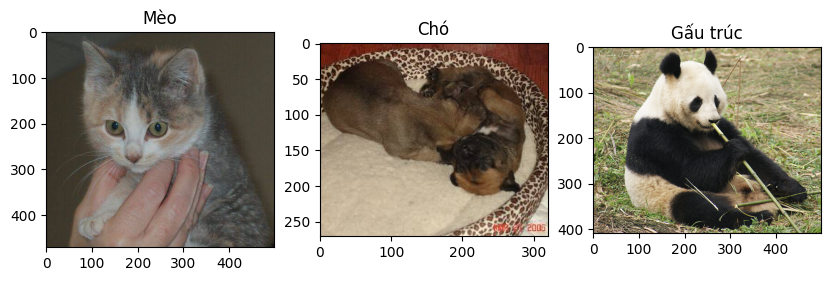

In [ ]:
# Tạo một biểu đồ với kích thước (10, 7) inch.
fig = plt.figure(figsize=(10, 7))

# Thiết lập giá trị cho các biến hàng và cột.
rows = 1
columns = 3

# Đọc một ảnh bất kì của mỗi lớp.
Image1 = image.load_img(folder_path + '/cats/cats_00008.jpg')
Image2 = image.load_img(folder_path + '/dogs/dogs_00003.jpg')
Image3 = image.load_img(folder_path + '/panda/panda_00005.jpg')


fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("Mèo")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Chó")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Gấu trúc")


Chia dữ liệu : Tập huấn luyện 80%, tập xác thực 20%

In [ ]:
train_datagen = ImageDataGenerator(
    fill_mode = 'nearest',
    validation_split = 0.2
)

Thiết lập dữ liệu


In [ ]:
train_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size = (108,108),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'training',
)
validation_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size = (108,108),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'validation',
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Model CNN với thư viện ResNet50

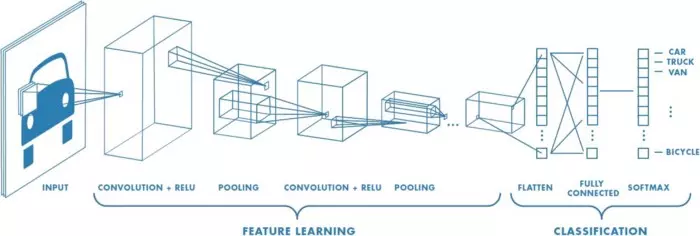
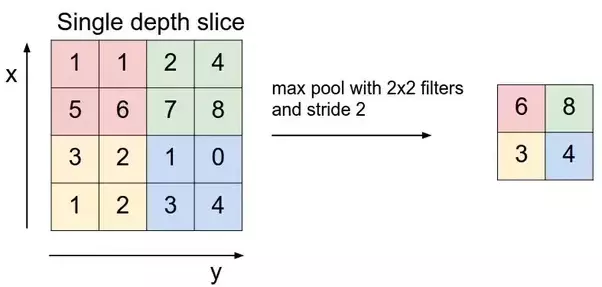

In [ ]:
from keras.applications import ResNet50
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(108,108,3), include_top=False),
])
for layer in model.layers:
    layer.trainable = False

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation = 'softmax'))

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 64)          1179712   
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0 

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=5,
    verbose=1,
)

Epoch 1/5
75/75 [==============================] - 163s 2s/step - loss: 1.8536 - accuracy: 0.7404 - val_loss: 0.3147 - val_accuracy: 0.8983
Epoch 2/5
75/75 [==============================] - 143s 2s/step - loss: 0.3947 - accuracy: 0.8721 - val_loss: 0.3921 - val_accuracy: 0.8833
Epoch 3/5
75/75 [==============================] - 154s 2s/step - loss: 0.2202 - accuracy: 0.9187 - val_loss: 0.2558 - val_accuracy: 0.9100
Epoch 4/5
75/75 [==============================] - 152s 2s/step - loss: 0.1497 - accuracy: 0.9492 - val_loss: 0.5006 - val_accuracy: 0.8750
Epoch 5/5
75/75 [==============================] - 147s 2s/step - loss: 0.1587 - accuracy: 0.9425 - val_loss: 0.4017 - val_accuracy: 0.9067


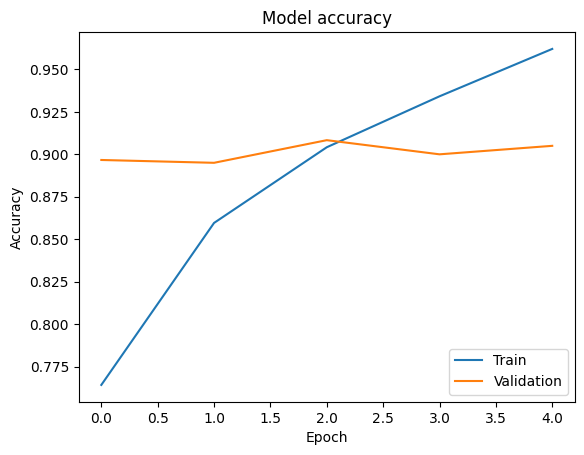

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

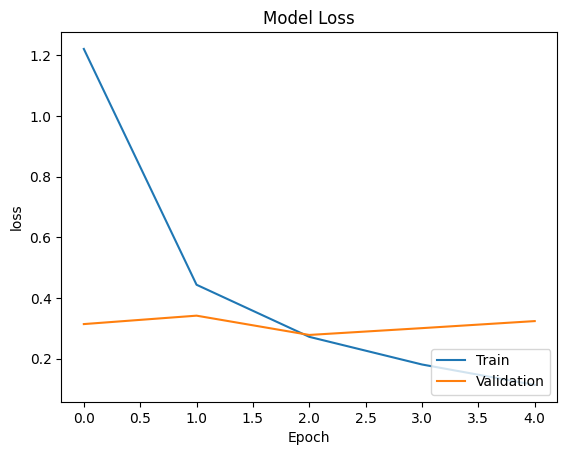

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model.save('/content/model')
model.save_weights('/content/weights.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/model')
loaded_model.load_weights('/content/weights.h5')

1/1 [==============================] - 0s 239ms/step
Mèo


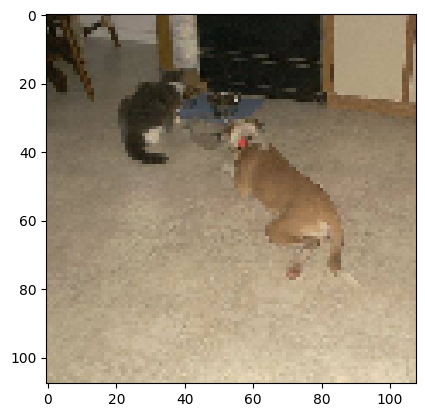

In [ ]:
#Input image
test_image = image.load_img('/content/animals/animals/cats/cats_00032.jpg',target_size=(108,108))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
# Result array
result = model.predict(test_image)

#Mapping result array with the main name list

if(result[0][0] > result[0][1] and result[0][0] > result[0][2]):
  print("Mèo")
elif(result[0][1] > result[0][0] and result[0][1] > result[0][2]):
  print("Chó")
else:
  print("Gấu trúc")